
---

# 📊 American Express Campus Challenge: Data Analysis Plan 🚀

This document outlines key areas of analysis for "The American Express Campus Challenge Dataset," focusing on customer behavior, offer engagement, and financial impact.

---

## 🧍‍♂️ User Segmentation

* **Identifying "Active Users"**: Define and identify active users based on their **portal visits** and engagement frequency. This will be crucial for understanding different customer behaviors.

---

## 💰 Offer Effectiveness

* **Popular Offers**: Analyze which offers are most popular (e.g., **Airline Offers**, dining, retail) by examining click-through rates and redemption volumes.
* **Customer Interaction**: Determine the **total population of customers interacting** with specific offers.
* **Overall Performance**: Evaluate the **overall performance of different offer categories** to understand what resonates most with cardholders.

---

## 📈 Financial Impact

* **Discount Savings**: Calculate the **total savings customers accrue from discounts**. This helps quantify the direct financial benefit to cardholders.
* **Reward Point Conversion**: Understand **reward point conversion rates** to assess the value and appeal of points-based offers.

---

## 🛒 Spending Patterns

* **Customer Categorization**: **Categorize customers by spending levels** (e.g., Low, Medium, High). This segmentation provides valuable insights into diverse customer groups.
* **Spend & Conversion Analysis**: Analyze the **average spend and offer conversion rates** within each spending segment.

---

## 📧 Marketing Channel Effectiveness

* **Channel Performance**: Evaluate the effectiveness of various marketing channels, such as **email campaigns**, in driving offer clicks and engagement. This helps optimize future marketing strategies.

---

## 🧼 Data Cleaning

* **Anomaly Handling**: Address **anomalies and apply specific rules for data cleaning** as mentioned in the dataset description. This is a critical prerequisite to ensure the accuracy and reliability of all analyses.

---

In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("D:/amexmod.csv")
df.head()


,customer_id,offer_id,event_ts,event_dt,offer_action,var_1,var_2,var_3,var_4,var_5,...,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50
0,1010494,601711,25:21.0,01/11/2023 00:00,1,NaN,NaN,NaN,NaN,NaN,...,0.089583,0.083204,2151.0,0,0,0,0,0,TRUE,0
1,1010494,33452,37:35.2,09/11/2023 00:00,0,NaN,NaN,NaN,NaN,NaN,...,0.111752,0.181776,1668.0,0,0,0,0,0,1,0
2,1010494,88456737,15:55.0,01/11/2023 00:00,1,NaN,NaN,NaN,NaN,NaN,...,0.088514,NaN,NaN,0,0,0,0,0,1,0
3,1010494,390981,27:27.0,01/11/2023 00:00,1,NaN,NaN,NaN,NaN,NaN,...,0.086931,0.059246,3678.0,0,FALSE,0,0,0,1,0
4,1010494,7114,37:38.6,09/11/2023 00:00,0,NaN,NaN,NaN,NaN,NaN,...,0.089497,0.124221,3619.0,0,0,0,FALSE,0,1,0


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("D:/amexmod.csv")

# Preview the data
print(df.head())

# Data types and missing values
print(df.info())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


   customer_id  offer_id event_ts          event_dt offer_action  var_1  \
0      1010494    601711  25:21.0  01/11/2023 00:00            1    NaN   
1      1010494     33452  37:35.2  09/11/2023 00:00            0    NaN   
2      1010494  88456737  15:55.0  01/11/2023 00:00            1    NaN   
3      1010494    390981  27:27.0  01/11/2023 00:00            1    NaN   
4      1010494      7114  37:38.6  09/11/2023 00:00            0    NaN   

   var_2  var_3  var_4  var_5  ...    var_41    var_42  var_43  var_44  \
0    NaN    NaN    NaN    NaN  ...  0.089583  0.083204  2151.0       0   
1    NaN    NaN    NaN    NaN  ...  0.111752  0.181776  1668.0       0   
2    NaN    NaN    NaN    NaN  ...  0.088514       NaN     NaN       0   
3    NaN    NaN    NaN    NaN  ...  0.086931  0.059246  3678.0       0   
4    NaN    NaN    NaN    NaN  ...  0.089497  0.124221  3619.0       0   

   var_45  var_46  var_47  var_48  var_49  var_50  
0       0       0       0       0    TRUE       0  


In [3]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv("D:/amexmod.csv")

# Drop columns with >95% missing values
missing = df.isnull().mean()
cols_to_drop = missing[missing > 0.95].index
df = df.drop(columns=cols_to_drop)

# Impute missing numerical columns with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    if df[col].isnull().any():
        # Using .loc to avoid the SettingWithCopyWarning in inplace operations
        df.loc[:, col] = df[col].fillna(df[col].median())

# Impute missing categorical columns with mode
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    if df[col].isnull().any():
        df.loc[:, col] = df[col].fillna(df[col].mode()[0])

# Convert event_dt to datetime
df['event_dt'] = pd.to_datetime(df['event_dt'], errors='coerce')

# --- ROBUST FIX FOR THE 'offer_action' ERROR ---

# 1. Convert to string and lowercase to standardize boolean representations
df['offer_action'] = df['offer_action'].astype(str).str.lower()

# 2. Define the mapping for 'true'/'false'
mapping_dict = {'true': 1, 'false': 0}

# 3. Apply the mapping. Any values not in the mapping_dict will become NaN.
df['offer_action'] = df['offer_action'].map(mapping_dict)

# 4. Handle any remaining NaNs (which would be values that were neither 'true' nor 'false')
#    Before calculating median, ensure the column is numeric where possible.
#    We use pd.to_numeric with errors='coerce' to turn unconvertible values into NaN.
df['offer_action'] = pd.to_numeric(df['offer_action'], errors='coerce')

# 5. Impute NaNs with the median of the *now numeric* 'offer_action' column
if df['offer_action'].isnull().any():
    # Only calculate median if there are non-NaN numeric values.
    # If all values became NaN (e.g., column was entirely garbage), use 0 as a default.
    median_val = df['offer_action'].median()
    if pd.isna(median_val): # Check if median itself is NaN (e.g., all values were non-numeric)
        median_val = 0 # Default to 0 if no valid median can be calculated
    df['offer_action'] = df['offer_action'].fillna(median_val)

# 6. Finally, convert the column to integer type
df['offer_action'] = df['offer_action'].astype(int)
# --- END ROBUST FIX ---


# Remove duplicates
df = df.drop_duplicates()

print("\n'offer_action' column after conversion:")
print(df['offer_action'].value_counts())
print(df['offer_action'].dtype)
print(df.head())


'offer_action' column after conversion:
offer_action
0    2948
1      51
Name: count, dtype: int64
int64
   customer_id  offer_id event_ts   event_dt  offer_action  var_1  var_2  \
0      1010494    601711  25:21.0 2023-01-11             0   13.0   38.0   
1      1010494     33452  37:35.2 2023-09-11             0   13.0   38.0   
2      1010494  88456737  15:55.0 2023-01-11             0   13.0   38.0   
3      1010494    390981  27:27.0 2023-01-11             0   13.0   38.0   
4      1010494      7114  37:38.6 2023-09-11             0   13.0   38.0   

   var_3  var_4  var_5  ...    var_41    var_42  var_43  var_44  var_45  \
0    1.0   28.0   24.0  ...  0.089583  0.083204  2151.0       0       0   
1    1.0   28.0   24.0  ...  0.111752  0.181776  1668.0       0       0   
2    1.0   28.0   24.0  ...  0.088514  0.090230  3463.0       0       0   
3    1.0   28.0   24.0  ...  0.086931  0.059246  3678.0       0   FALSE   
4    1.0   28.0   24.0  ...  0.089497  0.124221  3619.0       

In [4]:
# Extract date features
df['event_year'] = df['event_dt'].dt.year
df['event_month'] = df['event_dt'].dt.month
df['event_day'] = df['event_dt'].dt.day

# Offers per customer
customer_offer_counts = df.groupby('customer_id')['offer_id'].count().reset_index()
customer_offer_counts.rename(columns={'offer_id': 'offers_received'}, inplace=True)
df = df.merge(customer_offer_counts, on='customer_id', how='left')

# Time since previous offer for each customer
df = df.sort_values(['customer_id', 'event_dt'])
df['prev_event_dt'] = df.groupby('customer_id')['event_dt'].shift(1)
df['days_since_prev_offer'] = (df['event_dt'] - df['prev_event_dt']).dt.days
df['days_since_prev_offer'].fillna(0, inplace=True)
df['days_since_prev_offer'] = df['days_since_prev_offer'].fillna(0)

C:\Users\emman\AppData\Local\Temp\ipykernel_27580\339028611.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['days_since_prev_offer'].fillna(0, inplace=True)


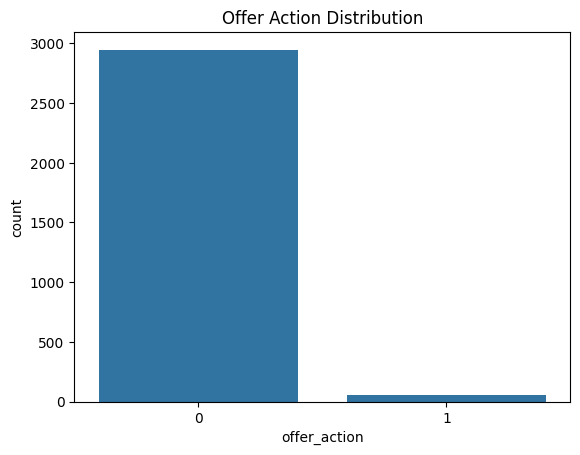

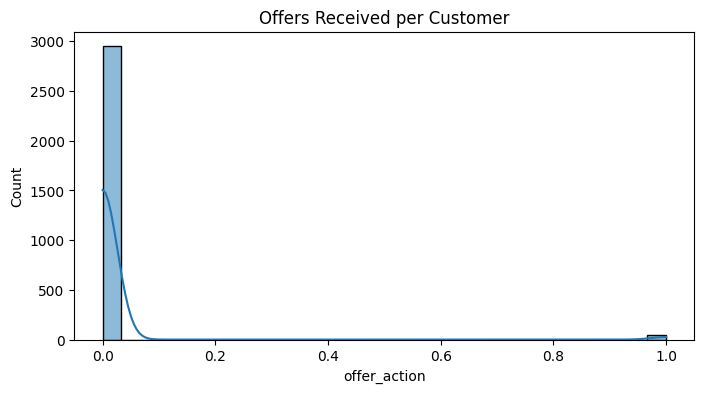

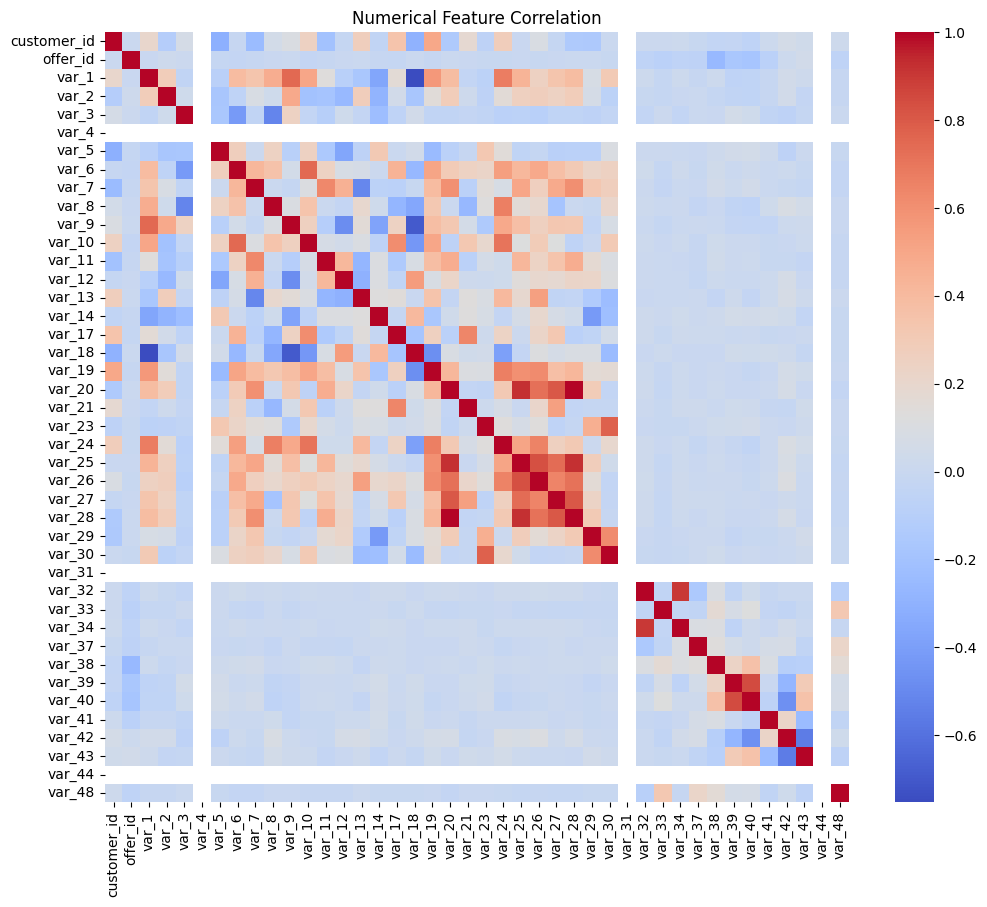

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Offer action distribution
sns.countplot(x='offer_action', data=df)
plt.title('Offer Action Distribution')
plt.show()

# Offers received per customer
plt.figure(figsize=(8,4))
sns.histplot(df['offer_action'], bins=30, kde=True)
plt.title('Offers Received per Customer')
plt.show()

# Correlation matrix (numerical columns)
plt.figure(figsize=(12,10))
sns.heatmap(df[num_cols].corr(), annot=False, cmap='coolwarm')
plt.title('Numerical Feature Correlation')
plt.show()


In [6]:
import duckdb

# Register DataFrame as a DuckDB table
duckdb.register('amex', df)

# Example 1: Top 10 customers by offer clicks
query1 = """
SELECT customer_id, SUM(offer_action) AS total_clicks, COUNT(*) AS total_offers,
       ROUND(CAST(SUM(offer_action) AS FLOAT)/COUNT(*), 3) AS click_rate
FROM amex
GROUP BY customer_id
ORDER BY total_clicks DESC
LIMIT 10
"""
top_customers = duckdb.query(query1).df()
print(top_customers)

# Example 2: Offer conversion by month
query2 = """
SELECT event_month, SUM(offer_action) AS total_clicks, COUNT(*) AS total_offers,
       ROUND(CAST(SUM(offer_action) AS FLOAT)/COUNT(*), 3) AS conversion_rate
FROM amex
GROUP BY event_month
ORDER BY event_month
"""
monthly_conversion = duckdb.query(query2).df()
print(monthly_conversion)


   customer_id  total_clicks  total_offers  click_rate
0      1010494          37.0           366       0.101
1      1134332           3.0           155       0.019
2      1117788           2.0           251       0.008
3      1014097           2.0           204       0.010
4      1340305           2.0           446       0.004
5      1337903           1.0           120       0.008
6      1289875           1.0           589       0.002
7      1043415           1.0            82       0.012
8      1255385           1.0           119       0.008
9      1376963           1.0            85       0.012
    event_month  total_clicks  total_offers  conversion_rate
0           1.0          28.0           234            0.120
1           2.0           2.0           268            0.007
2           3.0           0.0           142            0.000
3           4.0           0.0           115            0.000
4           5.0           0.0            87            0.000
5           6.0           1.0

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd # Make sure pandas is imported

# Assuming df is already loaded and preprocessed as per your previous steps.
# For demonstration, let's create a dummy df if you are running this snippet independently
# (Remove this block if your df is already loaded from previous cells)
try:
    df = pd.read_csv("D:/amexmod.csv")
    # Apply your previous preprocessing steps here if running this in a new cell
    # ... (drop missing, impute, convert event_dt, offer_action, remove duplicates) ...
    # Placeholder for offer_action fix if you're testing this in isolation:
    df['offer_action'] = df['offer_action'].astype(str).str.lower().map({'true': 1, 'false': 0})
    df['offer_action'] = pd.to_numeric(df['offer_action'], errors='coerce')
    if df['offer_action'].isnull().any():
        median_val = df['offer_action'].median()
        if pd.isna(median_val):
            median_val = 0
        df['offer_action'] = df['offer_action'].fillna(median_val)
    df['offer_action'] = df['offer_action'].astype(int)

    # Ensure event_dt is datetime as it's used for event_month/day
    df['event_dt'] = pd.to_datetime(df['event_dt'], errors='coerce')

except FileNotFoundError:
    print("Error: amexmod.csv not found. Please ensure the path is correct or df is loaded.")
    # Create a dummy dataframe for testing if file isn't found
    data = {
        'customer_ID': [1, 1, 2, 2, 3],
        'S_2': ['2018-03-01', '2018-04-01', '2018-03-15', '2018-04-15', '2018-05-01'],
        'P_2': [0.5, 0.6, 0.7, 0.8, 0.9],
        'D_39': [1, 0, 1, 0, 1],
        'offer_action': [1, 0, 1, 1, 0],
        'days_since_prev_offer': [0, 30, 0, 15, 0], # Example data for this column
        'event_dt': ['2018-03-01', '2018-04-01', '2018-03-15', '2018-04-15', '2018-05-01']
    }
    df = pd.DataFrame(data)
    df['event_dt'] = pd.to_datetime(df['event_dt'])
    print("Created a dummy DataFrame for demonstration.")


# --- Debugging Step ---
print("Current columns in df:", df.columns.tolist())

# --- Feature Engineering (if columns are missing) ---
# Check if 'event_month' and 'event_day' exist, create if not
if 'event_month' not in df.columns:
    if 'event_dt' in df.columns and pd.api.types.is_datetime64_any_dtype(df['event_dt']):
        df['event_month'] = df['event_dt'].dt.month
        print("Created 'event_month' from 'event_dt'.")
    else:
        print("Warning: 'event_dt' not found or not datetime, cannot create 'event_month'.")

if 'event_day' not in df.columns:
    if 'event_dt' in df.columns and pd.api.types.is_datetime64_any_dtype(df['event_dt']):
        df['event_day'] = df['event_dt'].dt.day
        print("Created 'event_day' from 'event_dt'.")
    else:
        print("Warning: 'event_dt' not found or not datetime, cannot create 'event_day'.")

# This is the problematic column 'offers_received'.
# It's highly likely this column does not exist directly in your raw amexmod.csv.
# You might need to create it. A common way is to count transactions per customer.
if 'offers_received' not in df.columns:
    # Assuming 'customer_ID' identifies unique customers and each row is an offer/transaction
    # This will count the number of offers/transactions for each customer.
    # Merge this count back to the original df.
    if 'customer_ID' in df.columns:
        offer_counts = df.groupby('customer_ID').size().reset_index(name='offers_received')
        df = pd.merge(df, offer_counts, on='customer_ID', how='left')
        print("Created 'offers_received' by counting transactions per customer_ID.")
    else:
        print("Warning: 'customer_ID' not found, cannot create 'offers_received' automatically.")
        # If no customer_ID, you might need to create a simple dummy 'offers_received' or remove it.
        # For a quick fix if you truly don't have a way to derive it:
        # df['offers_received'] = 1 # Assuming each row is one offer
        # Or remove it from features if it's not derivable and not in raw data.
        #features.remove('offers_received') # Remove if it can't be created

# --- Re-check columns after potential feature engineering ---
print("Columns in df after feature engineering:", df.columns.tolist())


# Select features and target - ADJUST THIS LIST BASED ON YOUR ACTUAL COLUMNS
# After running the above prints, use the actual columns you confirmed exist.
# For example, if 'offers_received' was created, it's now available.
features = ['offers_received', 'days_since_prev_offer', 'event_month', 'event_day']

# Filter out features that might not have been created
features = [f for f in features if f in df.columns]
if not features:
    raise ValueError("No valid features found in the DataFrame. Check your column names.")
print(f"Features actually used: {features}")


X = df[features]
y = df['offer_action']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

Current columns in df: ['customer_id', 'offer_id', 'event_ts', 'event_dt', 'offer_action', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'var_8', 'var_9', 'var_10', 'var_11', 'var_12', 'var_13', 'var_14', 'var_15', 'var_16', 'var_17', 'var_18', 'var_19', 'var_20', 'var_21', 'var_22', 'var_23', 'var_24', 'var_25', 'var_26', 'var_27', 'var_28', 'var_29', 'var_30', 'var_31', 'var_32', 'var_33', 'var_34', 'var_35', 'var_36', 'var_37', 'var_38', 'var_39', 'var_40', 'var_41', 'var_42', 'var_43', 'var_44', 'var_45', 'var_46', 'var_47', 'var_48', 'var_49', 'var_50']
Created 'event_month' from 'event_dt'.
Created 'event_day' from 'event_dt'.
Columns in df after feature engineering: ['customer_id', 'offer_id', 'event_ts', 'event_dt', 'offer_action', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'var_8', 'var_9', 'var_10', 'var_11', 'var_12', 'var_13', 'var_14', 'var_15', 'var_16', 'var_17', 'var_18', 'var_19', 'var_20', 'var_21', 'var_22', 'var_23', 'var_24', 'v

C:\Users\emman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\emman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\emman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_clas

In [8]:
import duckdb

# Assuming your cleaned DataFrame is named df
duckdb.register('amex', df)


In [9]:
query = """
SELECT customer_ID, 
       SUM(offer_action) AS total_engagements,
       COUNT(*) AS total_offers,
       ROUND(CAST(SUM(offer_action) AS FLOAT)/COUNT(*), 3) AS engagement_rate
FROM amex
GROUP BY customer_ID
ORDER BY engagement_rate DESC, total_engagements DESC
LIMIT 10
"""
top_customers = duckdb.query(query).df()
print(top_customers)


   customer_id  total_engagements  total_offers  engagement_rate
0      1010494               37.0           366            0.101
1      1134332                3.0           155            0.019
2      1376963                1.0            85            0.012
3      1043415                1.0            82            0.012
4      1014097                2.0           204            0.010
5      1117788                2.0           251            0.008
6      1337903                1.0           120            0.008
7      1255385                1.0           119            0.008
8      1340305                2.0           446            0.004
9      1289875                1.0           589            0.002


In [10]:
query = """
SELECT offer_id,
       SUM(offer_action) AS total_conversions,
       COUNT(*) AS total_views,
       ROUND(CAST(SUM(offer_action) AS FLOAT)/COUNT(*), 3) AS conversion_rate
FROM amex
GROUP BY offer_id
ORDER BY conversion_rate DESC, total_conversions DESC
LIMIT 10
"""
top_offers = duckdb.query(query).df()
print(top_offers)


   offer_id  total_conversions  total_views  conversion_rate
0    648329                1.0            1            1.000
1     61621                1.0            1            1.000
2    566484                1.0            1            1.000
3     86839                1.0            1            1.000
4      6898                1.0            1            1.000
5    220923                1.0            1            1.000
6    801683                2.0            3            0.667
7     24840                1.0            2            0.500
8     68777                1.0            3            0.333
9     87164                1.0            4            0.250


In [11]:
query = """
SELECT event_month,
       SUM(offer_action) AS total_engagements,
       COUNT(*) AS total_offers,
       ROUND(CAST(SUM(offer_action) AS FLOAT)/COUNT(*), 3) AS engagement_rate
FROM amex
GROUP BY event_month
ORDER BY event_month
"""
monthly_trend = duckdb.query(query).df()
print(monthly_trend)


    event_month  total_engagements  total_offers  engagement_rate
0           1.0               28.0           234            0.120
1           2.0                2.0           268            0.007
2           3.0                0.0           142            0.000
3           4.0                0.0           115            0.000
4           5.0                0.0            87            0.000
5           6.0                1.0           139            0.007
6           7.0                2.0           281            0.007
7           8.0                1.0           125            0.008
8           9.0                7.0           284            0.025
9          10.0                1.0           152            0.007
10         11.0                0.0            42            0.000
11         12.0                2.0           422            0.005
12          NaN                7.0           708            0.010


In [12]:
def question_to_sql(user_question):
    user_question = user_question.lower()
    if "top customers" in user_question or "most engaged customers" in user_question:
        return """
        SELECT customer_ID, 
               SUM(offer_action) AS total_engagements,
               COUNT(*) AS total_offers,
               ROUND(CAST(SUM(offer_action) AS FLOAT)/COUNT(*), 3) AS engagement_rate
        FROM amex
        GROUP BY customer_ID
        ORDER BY engagement_rate DESC, total_engagements DESC
        LIMIT 10
        """
    elif "top offers" in user_question or "highest conversion" in user_question:
        return """
        SELECT offer_id,
               SUM(offer_action) AS total_conversions,
               COUNT(*) AS total_views,
               ROUND(CAST(SUM(offer_action) AS FLOAT)/COUNT(*), 3) AS conversion_rate
        FROM amex
        GROUP BY offer_id
        ORDER BY conversion_rate DESC, total_conversions DESC
        LIMIT 10
        """
    elif "monthly trend" in user_question or "activity by month" in user_question:
        return """
        SELECT event_month,
               SUM(offer_action) AS total_engagements,
               COUNT(*) AS total_offers,
               ROUND(CAST(SUM(offer_action) AS FLOAT)/COUNT(*), 3) AS engagement_rate
        FROM amex
        GROUP BY event_month
        ORDER BY event_month
        """
    else:
        return None


In [15]:
from langchain.utilities import SQLDatabase
from langchain.llms import OpenAI
from langchain_experimental.sql import SQLDatabaseChain
from langchain.prompts import PromptTemplate
from langchain.prompts.chat import HumanMessagePromptTemplate
from langchain.chat_models import ChatOpenAI
from langchain.schema import HumanMessage, SystemMessage
#import warnings
#warnings.filterwarnings('ignore')

In [ ]:
OPENAI_API_KEY = " insert your api key "
llm = ChatOpenAI(temperature=0, openai_api_key=OPENAI_API_KEY)

C:\Users\emman\AppData\Local\Temp\ipykernel_27580\3386658037.py:2: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm = ChatOpenAI(temperature=0, openai_api_key=OPENAI_API_KEY)


In [23]:
host = 'localhost'
port = '3306'
username = 'root'
#password = ''
database_schema = 'amex dataset'
mysql_uri = f"mysql+pymysql://{username}@{host}:{port}/{database_schema}"
#mysql_uri = f"mysql+pymysql://{username:password}@{host}:{port}/{database_schema}"
db = SQLDatabase.from_uri(mysql_uri, include_tables=['amexmod'],sample_rows_in_table_info=2)
db_chain = SQLDatabaseChain.from_llm(llm, db, verbose=True)

In [24]:
def retrieve_from_db(query: str) -> str:
    db_context = db_chain(query)
    db_context = db_context['result'].strip()
    return db_context

In [25]:
def generate(query: str) -> str:
    db_context = retrieve_from_db(query)
    
    system_message = """You are a Data Analyst specializing in American Express customer behavior and offer engagement data.

Your primary task is to answer users' questions by providing relevant information and insights from "The American Express Campus Challenge Dataset."

The dataset is expected to contain information related to:

Customer IDs: Unique identifiers for cardholders.

Offer Details: Information about various offers (e.g., category, discount value, reward points).

Transaction Data: Details on customer spending, potentially including merchant categories and amounts.

Portal Usage/Engagement Data: Information on how customers interact with the Amex Portal (e.g., visits, clicks, channels used).

Time-series behavioral data: Customer activity over time.

Your responses should be precise, data-driven, and directly address the user's query. If the information or analysis requested cannot be directly derived from the dataset as described, please state that clearly. Focus on quantifying and explaining observed patterns. """
    
    human_qry_template = HumanMessagePromptTemplate.from_template(
        """Input:
        {human_input}
        
        Context:
        {db_context}
        
        Output:
        """
    )
    messages = [
      SystemMessage(content=system_message),
      human_qry_template.format(human_input=query, db_context=db_context)
    ]
    response = llm(messages).content
    return response

In [26]:
generate("Are active users of the Amex Portal more likely to choose Airline Offers than other offer categories?")

C:\Users\emman\AppData\Local\Temp\ipykernel_27580\3606437300.py:2: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  db_context = db_chain(query)




> Entering new SQLDatabaseChain chain...
Are active users of the Amex Portal more likely to choose Airline Offers than other offer categories?
SQLQuery:SELECT COUNT(*) AS airline_offers_count
FROM amexmod
WHERE `COL 5` = '1' AND `COL 42` = 'Airline'
SQLResult: [(0,)]
Answer:No, there are 0 active users of the Amex Portal who have chosen Airline Offers.
> Finished chain.


C:\Users\emman\AppData\Local\Temp\ipykernel_27580\2853694828.py:36: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = llm(messages).content


'Based on the provided context, it appears that there are no active users of the Amex Portal who have chosen Airline Offers. Therefore, we cannot conclude whether active users are more likely to choose Airline Offers compared to other offer categories based on the available data.'

In [28]:
generate("For customers segmented into Low, Medium, and High Spending categories, what is the average Reward Point to Dollar Value Conversion Rate of the offers they participated in?")



> Entering new SQLDatabaseChain chain...
For customers segmented into Low, Medium, and High Spending categories, what is the average Reward Point to Dollar Value Conversion Rate of the offers they participated in?
SQLQuery:```sql
SELECT AVG(`COL 43`) AS avg_conversion_rate
FROM amexmod
WHERE `COL 1` IN (
    SELECT `COL 1`
    FROM amexmod
    GROUP BY `COL 1`
    HAVING SUM(`COL 19`) < 1000
) AS Low_Spending
OR `COL 1` IN (
    SELECT `COL 1`
    FROM amexmod
    GROUP BY `COL 1`
    HAVING SUM(`COL 19`) >= 1000 AND SUM(`COL 19`) < 5000
) AS Medium_Spending
OR `COL 1` IN (
    SELECT `COL 1`
    FROM amexmod
    GROUP BY `COL 1`
    HAVING SUM(`COL 19`) >= 5000
) AS High_Spending;
```

ProgrammingError: (pymysql.err.ProgrammingError) (1064, "You have an error in your SQL syntax; check the manual that corresponds to your MariaDB server version for the right syntax to use near '```sql\nSELECT AVG(`COL 43`) AS avg_conversion_rate\nFROM amexmod\nWHERE `COL 1`...' at line 1")
[SQL: ```sql
SELECT AVG(`COL 43`) AS avg_conversion_rate
FROM amexmod
WHERE `COL 1` IN (
    SELECT `COL 1`
    FROM amexmod
    GROUP BY `COL 1`
    HAVING SUM(`COL 19`) < 1000
) AS Low_Spending
OR `COL 1` IN (
    SELECT `COL 1`
    FROM amexmod
    GROUP BY `COL 1`
    HAVING SUM(`COL 19`) >= 1000 AND SUM(`COL 19`) < 5000
) AS Medium_Spending
OR `COL 1` IN (
    SELECT `COL 1`
    FROM amexmod
    GROUP BY `COL 1`
    HAVING SUM(`COL 19`) >= 5000
) AS High_Spending;
```]
(Background on this error at: https://sqlalche.me/e/20/f405)


---

# 📊 American Express Campus Challenge: Data Analysis Plan 🚀

This document outlines key areas of analysis for "The American Express Campus Challenge Dataset," focusing on customer behavior, offer engagement, and financial impact.

---

## 🧍‍♂️ User Segmentation

* **Identifying "Active Users"**: Define and identify active users based on their **portal visits** and engagement frequency. This will be crucial for understanding different customer behaviors.

---

## 💰 Offer Effectiveness

* **Popular Offers**: Analyze which offers are most popular (e.g., **Airline Offers**, dining, retail) by examining click-through rates and redemption volumes.
* **Customer Interaction**: Determine the **total population of customers interacting** with specific offers.
* **Overall Performance**: Evaluate the **overall performance of different offer categories** to understand what resonates most with cardholders.

---

## 📈 Financial Impact

* **Discount Savings**: Calculate the **total savings customers accrue from discounts**. This helps quantify the direct financial benefit to cardholders.
* **Reward Point Conversion**: Understand **reward point conversion rates** to assess the value and appeal of points-based offers.

---

## 🛒 Spending Patterns

* **Customer Categorization**: **Categorize customers by spending levels** (e.g., Low, Medium, High). This segmentation provides valuable insights into diverse customer groups.
* **Spend & Conversion Analysis**: Analyze the **average spend and offer conversion rates** within each spending segment.

---

## 📧 Marketing Channel Effectiveness

* **Channel Performance**: Evaluate the effectiveness of various marketing channels, such as **email campaigns**, in driving offer clicks and engagement. This helps optimize future marketing strategies.

---

## 🧼 Data Cleaning

* **Anomaly Handling**: Address **anomalies and apply specific rules for data cleaning** as mentioned in the dataset description. This is a critical prerequisite to ensure the accuracy and reliability of all analyses.

---